In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('car_price.csv')
dataset[:]

,car_ID,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,enginelocation,cylindernumber,...,carweight,horsepower,peakrpm,citympg,highwaympg,boreratio,stroke,enginesize,compressionratio,price
0,1,alfa-romero giulia,gas,std,two,convertible,rwd,dohc,front,four,...,2548,111,5000,21,27,3.47,2.68,130,9.0,13495.0
1,2,alfa-romero stelvio,gas,std,two,convertible,rwd,dohc,front,four,...,2548,111,5000,21,27,3.47,2.68,130,9.0,16500.0
2,3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,ohcv,front,six,...,2823,154,5000,19,26,2.68,3.47,152,9.0,16500.0
3,4,audi 100 ls,gas,std,four,sedan,fwd,ohc,front,four,...,2337,102,5500,24,30,3.19,3.40,109,10.0,13950.0
4,5,audi 100ls,gas,std,four,sedan,4wd,ohc,front,five,...,2824,115,5500,18,22,3.19,3.40,136,8.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),gas,std,four,sedan,rwd,ohc,front,four,...,2952,114,5400,23,28,3.78,3.15,141,9.5,16845.0
201,202,volvo 144ea,gas,turbo,four,sedan,rwd,ohc,front,four,...,3049,160,5300,19,25,3.78,3.15,141,8.7,19045.0
202,203,volvo 244dl,gas,std,four,sedan,rwd,ohcv,front,six,...,3012,134,5500,18,23,3.58,2.87,173,8.8,21485.0
203,204,volvo 246,diesel,turbo,four,sedan,rwd,ohc,front,six,...,3217,106,4800,26,27,3.01,3.40,145,23.0,22470.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginetype        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   cylindernumber    205 non-null    object 
 10  fuelsystem        205 non-null    object 
 11  symboling         205 non-null    int64  
 12  wheelbase         205 non-null    float64
 13  carlength         205 non-null    float64
 14  carwidth          205 non-null    float64
 15  carheight         205 non-null    float64
 16  carweight         205 non-null    int64  
 1

In [4]:
dataset.isnull().sum()

car_ID              0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginetype          0
enginelocation      0
cylindernumber      0
fuelsystem          0
symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
carweight           0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
boreratio           0
stroke              0
enginesize          0
compressionratio    0
price               0
dtype: int64

In [5]:
dataset['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [6]:
dataset['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [7]:
dataset['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [8]:
dataset['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [9]:
dataset['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [10]:
dataset['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [11]:
dataset['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [12]:
dataset['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [13]:
dataset['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [14]:
dataset['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

<AxesSubplot:>

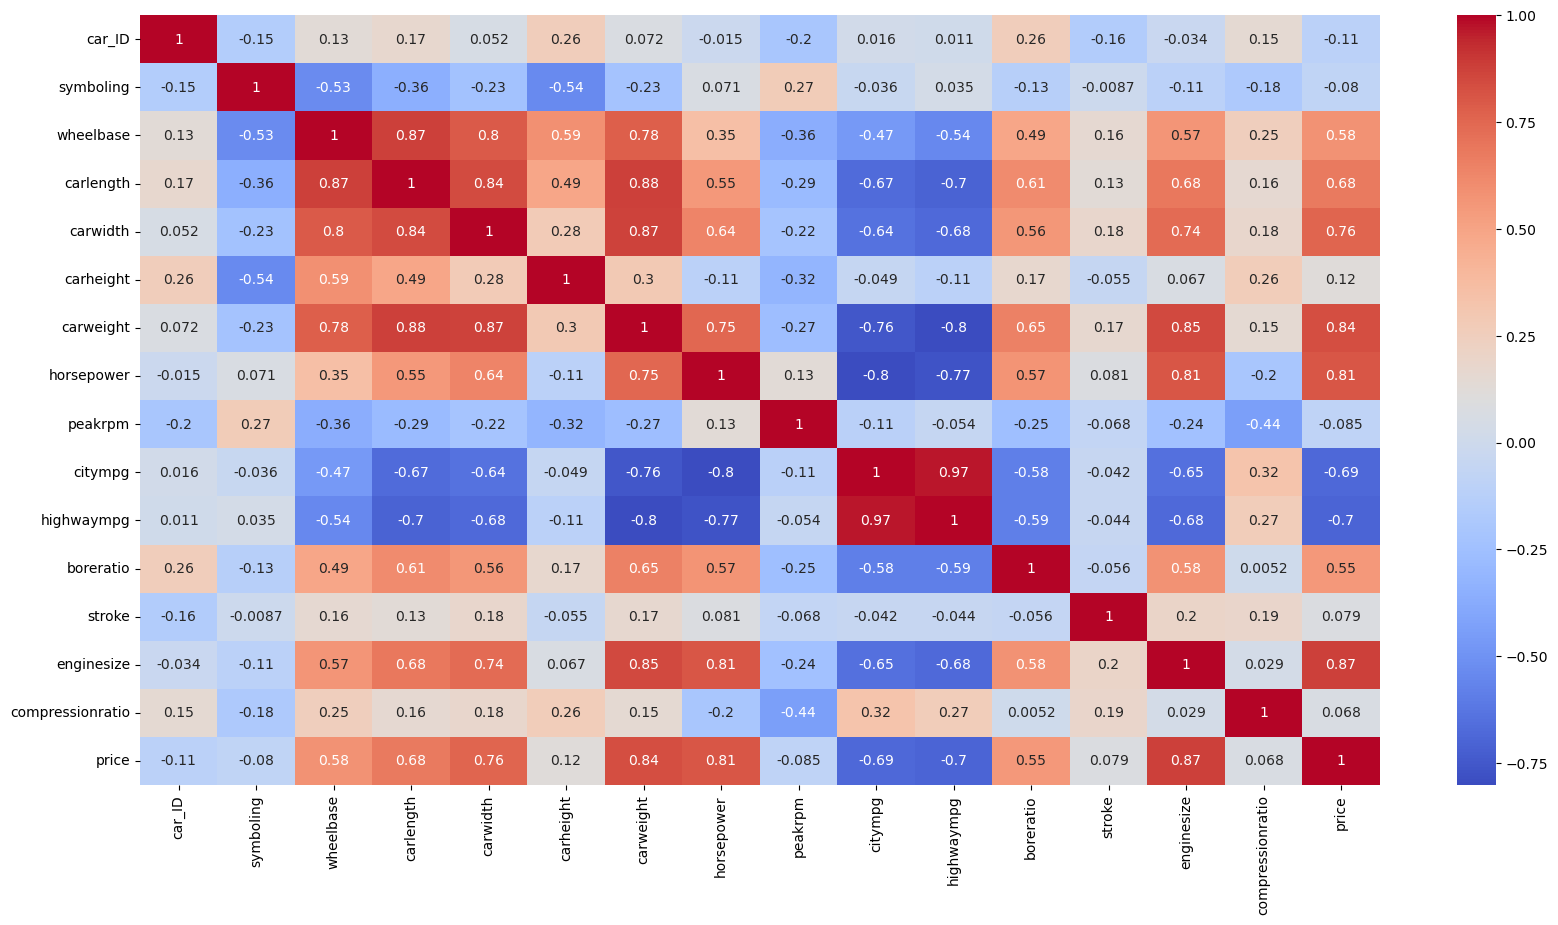

In [15]:
corr = dataset.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

###### We need to remove features which are highly correlated with each other because they will effect the final prediction

In [16]:
dataset = dataset.drop(columns=['car_ID','CarName','compressionratio','highwaympg','carlength','carwidth','enginesize','horsepower'])

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        205 non-null    object 
 1   aspiration      205 non-null    object 
 2   doornumber      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   enginetype      205 non-null    object 
 6   enginelocation  205 non-null    object 
 7   cylindernumber  205 non-null    object 
 8   fuelsystem      205 non-null    object 
 9   symboling       205 non-null    int64  
 10  wheelbase       205 non-null    float64
 11  carheight       205 non-null    float64
 12  carweight       205 non-null    int64  
 13  peakrpm         205 non-null    int64  
 14  citympg         205 non-null    int64  
 15  boreratio       205 non-null    float64
 16  stroke          205 non-null    float64
 17  price           205 non-null    flo

In [18]:
x1 = dataset.fueltype.unique()
mp1 = dict(zip(x1, range(len(x1))))
x2 = dataset.aspiration.unique()
mp2 = dict(zip(x2, range(len(x2))))
x3 = dataset.doornumber.unique()
mp3 = dict(zip(x3, range(len(x3))))
x4 = dataset.carbody.unique()
mp4 = dict(zip(x4, range(len(x4))))
x5 = dataset.drivewheel.unique()
mp5 = dict(zip(x5, range(len(x5))))
x6 = dataset.enginelocation.unique()
mp6 = dict(zip(x6, range(len(x6))))
x7 = dataset.fuelsystem.unique()
mp7 = dict(zip(x7, range(len(x7))))
x8 = dataset.enginetype.unique()
mp8 = dict(zip(x8, range(len(x8))))
x9 = dataset.cylindernumber.unique()
mp9 = dict(zip((x9), range(len(x9))))
dataset = dataset.replace({'fueltype': mp1, 'aspiration':mp2, 'doornumber':mp3, 'carbody':mp4,'drivewheel':mp5,
                           'enginelocation':mp6, 'fuelsystem':mp7, 'enginetype':mp8, 'cylindernumber':mp9})

In [19]:
dataset[:]

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,enginelocation,cylindernumber,fuelsystem,symboling,wheelbase,carheight,carweight,peakrpm,citympg,boreratio,stroke,price
0,0,0,0,0,0,0,0,0,0,3,88.6,48.8,2548,5000,21,3.47,2.68,13495.0
1,0,0,0,0,0,0,0,0,0,3,88.6,48.8,2548,5000,21,3.47,2.68,16500.0
2,0,0,0,1,0,1,0,1,0,1,94.5,52.4,2823,5000,19,2.68,3.47,16500.0
3,0,0,1,2,1,2,0,0,0,2,99.8,54.3,2337,5500,24,3.19,3.40,13950.0
4,0,0,1,2,2,2,0,2,0,2,99.4,54.3,2824,5500,18,3.19,3.40,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,1,2,0,2,0,0,0,-1,109.1,55.5,2952,5400,23,3.78,3.15,16845.0
201,0,1,1,2,0,2,0,0,0,-1,109.1,55.5,3049,5300,19,3.78,3.15,19045.0
202,0,0,1,2,0,1,0,1,0,-1,109.1,55.5,3012,5500,18,3.58,2.87,21485.0
203,1,1,1,2,0,2,0,1,6,-1,109.1,55.5,3217,4800,26,3.01,3.40,22470.0


In [20]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X[:,9:17] = scaler_X.fit_transform(X[:,9:17])
y = scaler_y.fit_transform(y.reshape(-1,1))

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_pred = lin_reg.predict(X_test)
print("Linear Regressor Root Mean Squared Error:",mean_squared_error(y_test,lin_pred,squared=False))

Linear Regressor Root Mean Squared Error: 0.09293133409474447


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rand_reg = RandomForestRegressor(random_state=1)
rand_reg.fit(X_train,y_train)
rand_pred = rand_reg.predict(X_test)
print("Random Forest Root Mean Squared Error:",mean_squared_error(y_test,rand_pred,squared=False))

C:\Users\Awais Tanveer Khan\AppData\Local\Temp\ipykernel_10644\3273846200.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_reg.fit(X_train,y_train)


Random Forest Root Mean Squared Error: 0.06209077951438176


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,mean_squared_error
dec_reg = DecisionTreeRegressor(random_state=1)
dec_reg.fit(X_train, y_train)
dec_pred = dec_reg.predict(X_test)
print("Decision Tree Root Mean Squared Error:",mean_squared_error(y_test,dec_pred,squared=False))

Decision Tree Root Mean Squared Error: 0.06227064087881689
